In [1]:
from sklearn.cluster import KMeans
import numpy as np
import random
import copy
import pandas as pd
import matplotlib.pyplot as plt
import operator
from sklearn import datasets

In [2]:
#获取数据集
iris = datasets.load_iris()
data = iris.data
target = iris.target

# 将鸢尾花数据集化成图

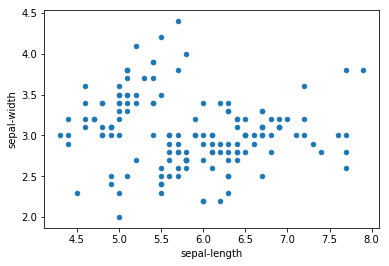

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url,names=names)
#绘制散点图
dataset.plot(x='sepal-length', y='sepal-width', kind='scatter')

In [4]:
#获得相似度矩阵
points_num = len(data)

In [5]:
dis_matrix = np.zeros((points_num,points_num))

In [6]:
W = np.zeros((points_num,points_num))

In [7]:
for i in range(points_num):
    for j in range(i+1,points_num):
        dis_matrix[i][j] = dis_matrix[j][i] = np.linalg.norm(data[i]-data[j])#欧式距离矩阵

In [8]:
for idx,each in enumerate(dis_matrix):
    index_array = np.argsort(each)#argsort是返回该行数据从小到大排序的索引
    W[idx][index_array[1]] = 5
    W[idx][index_array[2]] = 4
    W[idx][index_array[3]] = 3
    W[idx][index_array[4]] = 2
    W[idx][index_array[5]] = 1
print(W)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# 计算带权邻接矩阵

In [9]:
tmp_W = np.transpose(W)#W的转置
W = (tmp_W+W)/2#转置相加除以2是为了让矩阵对称，W为带权邻接矩阵
W

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
#获得度矩阵
points_num = len(W)
D = np.diag(np.zeros(points_num))

In [11]:
for i in range(points_num):
    D[i][i] = sum(W[i])

In [12]:
D

array([[23. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. , 20. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. , 18.5, ...,  0. ,  0. ,  0. ],
       ...,
       [ 0. ,  0. ,  0. , ..., 21.5,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. , 12.5,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. , 16. ]])

In [13]:
#获得拉普拉斯矩阵
L = D - W

In [14]:
#从拉普拉斯矩阵获得特征矩阵
eigval,eigvec = np.linalg.eig(L)#拉普拉斯矩阵的特征值和右特征向量
dim = len(eigval)
eigval

array([-3.27515792e-15,  3.87834055e-01,  2.86927434e+01,  1.72178633e+00,
        1.84274565e+00,  2.68645413e+01,  2.65850818e+01,  2.62563949e+01,
        2.56227779e+01,  2.53952766e+01,  2.47890513e+01,  2.38510233e+01,
        3.38470335e+00,  4.22174707e+00,  4.61575218e+00,  4.45506424e+00,
        5.78238023e+00,  6.60062760e+00,  2.29056723e+01,  2.28790596e+01,
        2.07638516e+01,  2.16744471e+01,  2.12888349e+01,  2.21516520e+01,
        2.22207803e+01,  7.33757493e+00,  2.00158800e+01,  7.66897915e+00,
        1.94326939e+01,  8.74146186e+00,  1.87184749e+01,  1.84581092e+01,
        1.74950723e+01,  9.60549200e+00,  8.89469466e+00,  1.02276465e+01,
        1.05907130e+01,  1.69789798e+01,  1.16765713e+01,  1.13972465e+01,
        1.67743778e+01,  1.51645285e+01,  1.46138000e+01,  1.30794204e+01,
        1.36752316e+01,  1.27270386e+01,  1.41273624e+01,  1.73333828e+01,
        1.57495601e+01,  1.55618786e+01,  3.00711665e+01,  2.79496018e+01,
        2.77722226e+01,  

In [15]:
dictEigval = dict(zip(eigval,range(0,dim)))#将字典的键和值反转过来

In [16]:
dictEigval

{-3.2751579226442118e-15: 0,
 0.38783405456905273: 1,
 28.69274343130886: 2,
 1.7217863342120836: 3,
 1.8427456519221672: 4,
 26.864541322562445: 5,
 26.585081806768873: 6,
 26.256394865795688: 7,
 25.622777916576705: 8,
 25.395276625032754: 9,
 24.789051335707594: 10,
 23.851023337119116: 11,
 3.384703348920533: 12,
 4.221747066288515: 13,
 4.615752184701194: 14,
 4.45506424319288: 15,
 5.782380234187318: 16,
 6.600627602155304: 17,
 22.905672284510942: 18,
 22.87905959285819: 19,
 20.763851580650094: 20,
 21.674447105021418: 21,
 21.288834882927002: 22,
 22.15165199388636: 23,
 22.220780295547943: 24,
 7.337574925076949: 25,
 20.015880015627303: 26,
 7.668979148856645: 27,
 19.4326939414253: 28,
 8.741461862951274: 29,
 18.7184749395233: 30,
 18.45810917422487: 31,
 17.49507229891178: 32,
 9.605491997542066: 33,
 8.894694656454346: 34,
 10.227646477651135: 35,
 10.590712990489989: 36,
 16.978979755782508: 37,
 11.676571324007018: 38,
 11.397246546181231: 39,
 16.774377759595563: 40,


In [17]:
kEig = np.sort(eigval)[0:3]#将特征值从小到大排序然后选出最小的三个

In [18]:
kEig

array([-7.86978256e-15, -3.27515792e-15,  1.18359208e-01])

In [19]:
ix = [dictEigval[k] for k in kEig]#获得最小的三个特征值得索引

In [20]:
eigvec = eigvec[:,ix]#特征值对应的特征向量

In [142]:
clf = KMeans(n_clusters=3,n_init=3)

In [146]:
s = clf.fit(eigvec)

In [147]:
C = s.labels_

In [148]:
#聚类结果
C

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [151]:
#画图，使得每种类别用不同的标记及颜色表示，同时使相似度大的两个样本之间有一条线，随着相似度的减弱线的深度减小
def plot(matrix,C,k,dis_matrix):
    for idx,value in enumerate(C):
        if C[idx] == 0:
            plt.plot(matrix[idx][0],matrix[idx][1],'^',color='r')
        elif C[idx] == 1:
            plt.plot(matrix[idx][0],matrix[idx][1],'o',color='b')
        else:
            plt.plot(matrix[idx][0],matrix[idx][1],'s',color='black')
    for idx,each in enumerate(dis_matrix):
        ia = np.argsort(each)
        plt.plot([data[ia[0]][0],data[ia[1]][0]],[data[ia[0]][1],data[ia[1]][1]],linewidth='0.6',color='black')
        plt.plot([data[ia[0]][0],data[ia[2]][0]],[data[ia[0]][1],data[ia[2]][1]],linewidth='0.5',color='black')
        plt.plot([data[ia[0]][0],data[ia[3]][0]],[data[ia[0]][1],data[ia[3]][1]],linewidth='0.4',color='black')
        plt.plot([data[ia[0]][0],data[ia[4]][0]],[data[ia[0]][1],data[ia[4]][1]],linewidth='0.3',color='black')
        plt.plot([data[ia[0]][0],data[ia[5]][0]],[data[ia[0]][1],data[ia[5]][1]],linewidth='0.2',color='black')
        plt.plot([data[ia[1]][0],data[ia[2]][0]],[data[ia[1]][1],data[ia[2]][1]],linewidth='0.5',color='black')
        plt.plot([data[ia[1]][0],data[ia[3]][0]],[data[ia[1]][1],data[ia[3]][1]],linewidth='0.4',color='black')
        plt.plot([data[ia[1]][0],data[ia[4]][0]],[data[ia[1]][1],data[ia[4]][1]],linewidth='0.3',color='black')
        plt.plot([data[ia[1]][0],data[ia[5]][0]],[data[ia[1]][1],data[ia[5]][1]],linewidth='0.2',color='black')
        plt.plot([data[ia[2]][0],data[ia[3]][0]],[data[ia[2]][1],data[ia[3]][1]],linewidth='0.4',color='black')
        plt.plot([data[ia[2]][0],data[ia[4]][0]],[data[ia[2]][1],data[ia[4]][1]],linewidth='0.3',color='black')
        plt.plot([data[ia[2]][0],data[ia[5]][0]],[data[ia[2]][1],data[ia[5]][1]],linewidth='0.2',color='black')
        plt.plot([data[ia[3]][0],data[ia[4]][0]],[data[ia[3]][1],data[ia[4]][1]],linewidth='0.3',color='black')
        plt.plot([data[ia[3]][0],data[ia[5]][0]],[data[ia[3]][1],data[ia[5]][1]],linewidth='0.2',color='black')
        plt.plot([data[ia[4]][0],data[ia[5]][0]],[data[ia[4]][1],data[ia[5]][1]],linewidth='0.2',color='black')
#     for i in range(len(centers)):
#         plt.plot(centers[i][0],centers[i][1],'rx')
    plt.savefig('鸢尾花聚类.jpg')
    plt.show()

# 画图

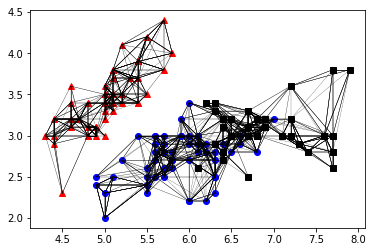

In [152]:
plot(data,s.labels_,3,dis_matrix)

# 计算正确率

In [66]:
s = 0
for i in range(len(target)):
    if C[i]==target[i]:
        s += 1
print(s/len(target))

0.9066666666666666


In [90]:
#调参
clf = KMeans(n_clusters=4,n_init=3)
s = clf.fit(eigvec)
C = s.labels_
print(C)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 3 1 3 1 3 1 3 3 3 3 3 3 1 3 3 1 3 1 3 1 3
 1 1 1 1 3 3 3 3 3 1 3 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 2 1 2 2 2 2 3 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [91]:
s = 0
for i in range(len(target)):
    if C[i]==target[i]:
        s += 1
print(s/len(target))

0.6866666666666666


In [94]:
clf = KMeans(n_clusters=2,n_init=3)
s = clf.fit(eigvec)
C = s.labels_
print(C)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [95]:
s = 0
for i in range(len(target)):
    if C[i]==target[i]:
        s += 1
print(s/len(target))

0.6666666666666666


In [99]:
clf = KMeans(n_clusters=3,n_init=5)
s = clf.fit(eigvec)
C = s.labels_
print(C)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [100]:
s = 0
for i in range(len(target)):
    if C[i]==target[i]:
        s += 1
print(s/len(target))

0.9066666666666666


In [106]:
clf = KMeans(n_clusters=3,n_init=10)
s = clf.fit(eigvec)
C = s.labels_
print(C)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [107]:
s = 0
for i in range(len(target)):
    if C[i]==target[i]:
        s += 1
print(s/len(target))

0.9066666666666666
